### All Imports

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error, r2_score

### Load and Preprocess the data for Model Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test.values)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Model Creation and Development

In [3]:
model = SVR(kernel='poly', degree=2)
model.fit(X_train_normalized, y_train_normalized)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=2, kernel='poly')

### Model Performance Metrics Using the Training Set

In [4]:
y_train_pred_scaled = model.predict(X_train_normalized)
y_train_pred = scaler_Y.inverse_transform(y_train_pred_scaled.reshape(-1,1))

In [5]:
rmse_train = np.sqrt(mse(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
r_value_train = sqrt(r2_train)


print(f'MAPE: {rmse_train :.4f}')
print(f'MAPE: {mape_train :.4f}')
print(f'R-squared (R²): {r2_train:.4f}')
print(f'R-value (R): {r_value_train:.4f}')

MAPE: 0.5259
MAPE: 0.0053
R-squared (R²): 0.8029
R-value (R): 0.8960


### Model Performance Metrics using the Test Set

In [6]:
y_pred_scaled = model.predict(X_test_normalized)
y_test_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [7]:
rmse_test = np.sqrt(mse(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
r_value_test = sqrt(r2_test)


print(f'MAPE: {rmse_test :.4f}')
print(f'MAPE: {mape_test :.4f}')
print(f'R-squared (R²): {r2_test:.4f}')
print(f'R-value (R): {r_value_test:.4f}')

MAPE: 0.5934
MAPE: 0.0052
R-squared (R²): 0.6203
R-value (R): 0.7876


### Comparison of the Predicted and Actual Values for the Training set

In [8]:
compare_train_df = pd.DataFrame(y_train_pred, columns=['Predicted'])
compare_train_df['Actual'] = y_train

### Comparison of the Predicted and Actual Values for the Training set

In [9]:
compare_test_df = pd.DataFrame(y_test_pred, columns=['Predicted'])
compare_test_df['Actual'] = y_test

#### A small peek into the dataframe of the predicted and actual values

In [10]:
compare_train_df.head(10)

,Predicted,Actual
0,88.234077,87.961187
1,89.127570,88.565905
2,89.947782,90.986610
3,91.321371,91.640657
4,90.639949,91.081881
5,90.417608,89.832310
6,91.153167,91.594430
7,91.172373,90.492627
8,90.853706,91.337506
9,91.107047,90.651737


In [11]:
compare_test_df.head(10)

,Predicted,Actual
0,90.129575,89.959033
1,90.699530,90.590392
2,89.233477,88.761667
3,89.798086,90.777612
4,90.404619,90.116769
5,90.710976,90.428091
6,91.094868,91.709526
7,89.289700,89.376526
8,91.311079,90.828132
9,90.745704,90.003263


### The comparison plot for the Training Set Predictions and Actual Values

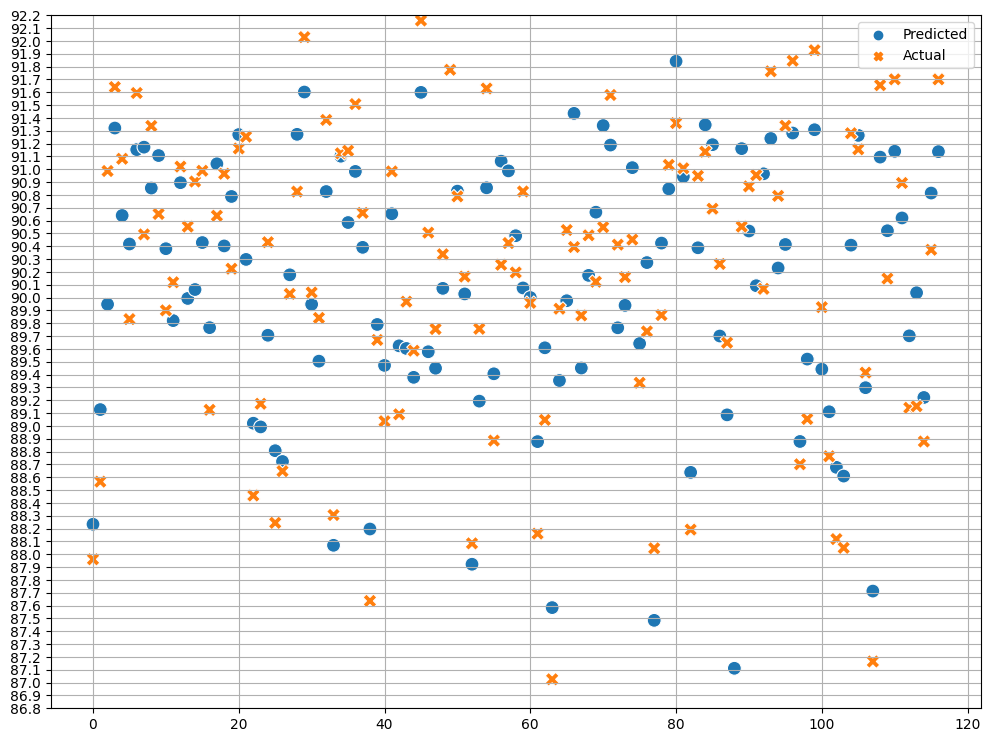

In [12]:
plt.figure(figsize=(12,9))

y_ticks = np.arange(86.8, 92.2, 0.1)
plt.ylim(86.8, 92.2)
plt.yticks(y_ticks)


sns.scatterplot(compare_train_df, s=100)
plt.grid(True)

### The comparison plot for the Test Set Predictions and Actual Values

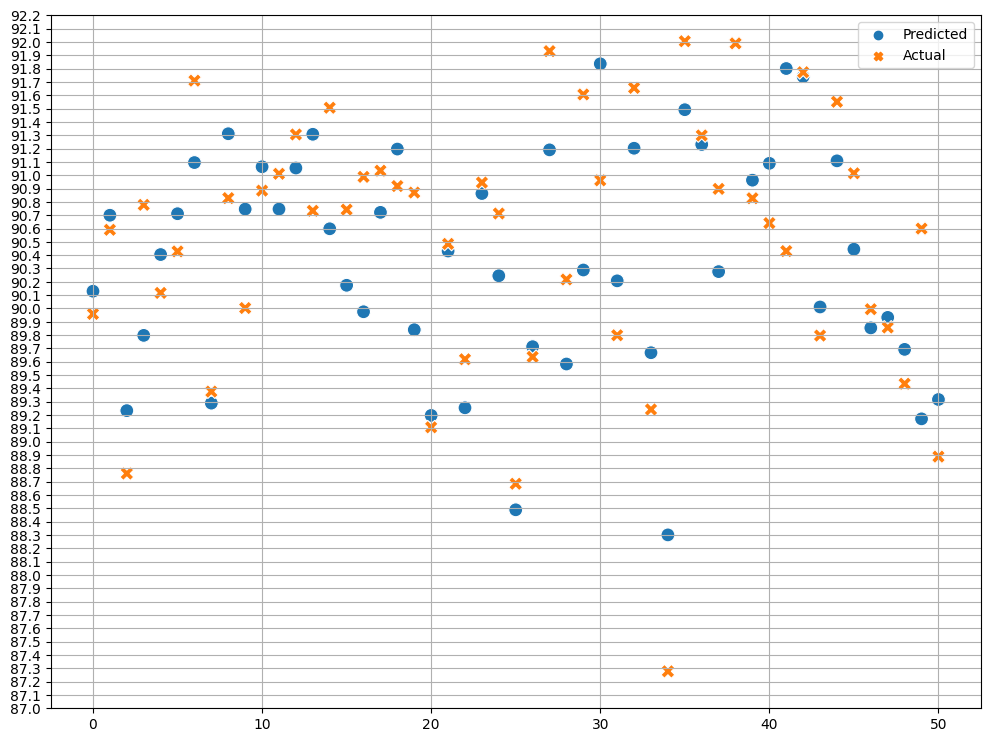

In [13]:
plt.figure(figsize=(12,9))

y_ticks = np.arange(87.0, 92.2, 0.1)
plt.ylim(87.0, 92.2)
plt.yticks(y_ticks)


sns.scatterplot(compare_test_df, s=100)
plt.grid(True)

# Work Done :)